# Prelab 4

In [20]:
# Imports and setup
from pint import UnitRegistry
import math
import numpy as np 
import matplotlib.pyplot as plt

# Use pint
units = UnitRegistry()
units.default_format = "~P"

# Define Tesla
ureg = UnitRegistry()
ureg.setup_matplotlib()
Q_ = ureg.Quantity

In [49]:
# Known values
L_goal = 20*10**(-6) * units.henry
B_max = 0.2 * units.tesla
D_max = 0.5 # Duty Cycle Max
I_pk = 6 * units.amp # Switched from 10 A from note from CAs
I_rms_cu = 10 * units.amp / (units.mm)**2 # rms
A_cmin = 59.1 * (units.mm)**2
A_w = 44 * (units.mm)**2
K_F = 0.05
A_coil = (11.1/2 * units.mm)**2 * math.pi

Lg_inches = np.array([
    0.002,
    0.003,
    0.004,
    0.005,
    0.006,
    0.007,
    0.008,
    0.009,
    0.01,
    0.011,
    0.012,
    0.013,
    0.014,
    0.015,
    0.016,
    0.017,
    0.018,
    0.019,
    0.020,
    0.021,
    0.022,
    0.023,
    0.024,
    0.025,
    0.026,
    0.027
]) # inches

Lg = Lg_inches*25.4*units.mm

wires = {
    0.82: 18,
    0.52: 20,
    0.33: 22,
    0.20: 24 
} # mm^2: awg

u_o = 1.2566 * 10**(-6) # free space (we only need this value)

In [22]:
# Current calculation and wire sizing
I_rms = math.sqrt(D_max/3) * I_pk
min_wire_area = I_rms/I_rms_cu
wire_gauge=0

for area in wires:
    if area > min_wire_area.magnitude:
        wire_gauge = wires[area]
        
print("Min wire gauge:", wire_gauge)

Min wire gauge: 22


In [48]:
# Calculate flux max and relevant values
phi_max = A_cmin * B_max
print("Phi_max:", phi_max)
min_turns = ((L_goal*I_rms)/phi_max).to_base_units()
print("Min turns:", math.ceil(min_turns))

F_max = I_rms_cu * A_w * K_F
print("F_max:", F_max.to_base_units())

Phi_max: 11.82 T·mm²
Min turns: 5
F_max: 22.0 A


In [51]:
# 2 * outer area + inner area
area_finder = lambda t: 2 * ((2*(7+t)*(10.65+t) - (7+t)*math.sqrt((9-t)**2 - (7+t)**2) - (9 - t)**2 * math.asin((7+t)/(9-t)))) + (np.pi*(8.8/2 + t)**2)
reluctance_finder = lambda t: u_o*10**(-3)*area_finder(t)/t
vfunc = np.vectorize(reluctance_finder)
R = vfunc(Lg)
N = np.sqrt(np.divide(L_goal,R))

# B = N*I_rms*u_o incorrect
F = N*I_rms
phi = np.divide(F, R)
B = phi / A_coil
W = 0.5 * np.multiply(np.power(phi, 2), R)


print(B)

[17383.159941754504 31009.86044731889 46375.5966998048 62976.56430835554 80466.24233703247 98589.580798375 117151.0547816078 135996.72691482137 155003.16073264682 174070.08476243037 193115.28537572848 212070.90925220188 230880.70217127595 249497.89477594217 267883.55003169517 286005.24907761393 303836.03067399113 321353.5242530211 338539.2330476996 355377.93499212095 371857.176886584 387966.8428246797 403698.781785951 419046.4820438754 434004.7818876631 448569.60724041413] A·H⁰⋅⁵/mm²


/home/lila/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2404: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  args = [asarray(arg) for arg in args]
/home/lila/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2453: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  inputs = [asanyarray(a, dtype=object) for a in args]


[2.0 2.0 3.0 3.0 3.0 4.0 4.0 4.0 4.0 5.0 5.0 5.0 5.0 5.0 5.0 6.0 6.0 6.0 6.0 6.0 6.0 6.0 6.0 6.0 6.0 7.0] H⁰⋅⁵
[1.3949030696020029e-05 9.483383342091427e-06 1.6316212709178566e-05 1.3305352642949588e-05 1.1299777315442414e-05 1.7544291128539428e-05 1.563840189358822e-05 1.4158074760998123e-05 1.2975660360000567e-05 1.8765512833439398e-05 1.7510508763213775e-05 1.6450879924609782e-05 1.554478698044825e-05 1.4761549292545717e-05 1.4078157977216205e-05 1.940690832189322e-05 1.8640011428754147e-05 1.795630521306761e-05 1.7343351236888186e-05 1.67910833398602e-05 1.6291268880979585e-05 1.5837110601693214e-05 1.5422948115540057e-05 1.5044031154594672e-05 1.4696345287633959e-05 1.956798197408563e-05] H


/home/lila/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1345: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Text(0.5, 0, 'Lg')

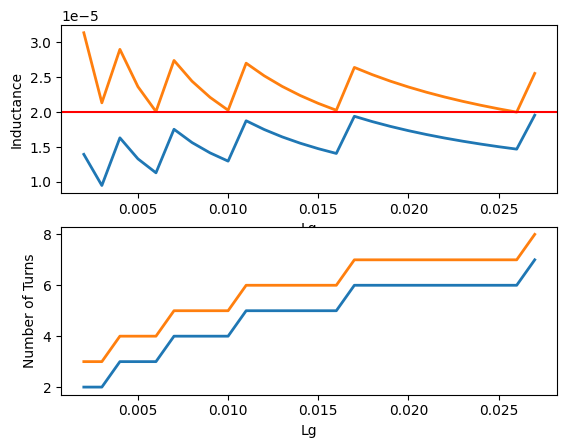

In [50]:
N_Floor = np.floor(N)
N_Ceiling = N_Floor.magnitude + 1

L_Possible = np.multiply(np.power(N_Floor,2),R)
L_Ceiling = np.multiply(np.power(N_Ceiling,2),R)

fig, ax = plt.subplots(2)

print(N_Floor)
print(L_Possible)

ax[0].plot(Lg_inches,L_Possible, linewidth=2.0)
ax[0].plot(Lg_inches,L_Ceiling, linewidth=2.0)
ax[0].axhline(y = 2.0e-05, color = 'r', linestyle = '-') 
ax[0].set_ylabel("Inductance")
ax[0].set_xlabel("Lg")

ax[1].plot(Lg_inches, N_Floor, linewidth=2.0)
ax[1].plot(Lg_inches, N_Ceiling, linewidth=2.0)
ax[1].set_ylabel("Number of Turns")
ax[1].set_xlabel("Lg")